<div style="color:white;background-color:#5642C5;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Beginners 🚀 Step by Step 📈 Guide to GridSearchCV 🧾 </div>

![](https://miro.medium.com/max/746/1*E3FOlkD7LyeTbKMoTDnwFQ.png)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>GridSearchCV</b>
        </p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EEC3B3;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
          A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. However, there are some parameters, known as Hyperparameters and those cannot be directly learned. They are commonly chosen by humans based on some intuition or hit and trial before the actual training begins. These parameters exhibit their importance by improving the performance of the model such as its complexity or its learning rate. Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem.
        </p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EEC3B3;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
          SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations (hence, this method is called Gridsearch, But don’t worry! we don’t have to do it manually because Scikit-learn has this functionality built-in with GridSearchCV.
GridSearchCV takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.
This article demonstrates how to use the GridSearchCV searching method to find optimal hyper-parameters and hence improve the accuracy/prediction results 
        </p>
</div>

> **What is grid search?**

> **What are the pros and cons?**


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EEC3B3;
           font-size:18px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 8px;
              color:black;">
          Gridsearch is a simple concept but effective technique in Machine Learning. The word GridSearch stands for the fact that we are searching for optimal parameter/parameters over a "grid." These optimal parameters are also known as Hyperparameters. The Hyperparameters are model parameters that are set before fitting the model and determine the behavior of the model. For example, when we choose to use linear regression, we may decide to add a penalty to the loss function such as Ridge or Lasso. These penalties require specific alpha (the strength of the regularization technique) to set beforehand. The higher the value of alpha, the more penalty is being added. GridSearch finds the optimal value of alpha among a range of values provided by us, and then we go on and use that optimal value to fit the model and get sweet results. It is essential to understand those model parameters are different from models outcomes, for example, **coefficients** or model evaluation metrics such as **accuracy score** or **mean squared error** are model outcomes and different than hyperparameters.
        </p>
</div>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

In [3]:
loan = pd.read_csv("../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
loan = loan.drop("Loan_ID",axis=1)

In [4]:
loan.head().style.set_properties(**{'background-color' : 'Yellow',
                           'color' : 'Blue',
                           'border-color' : 'Blue',
                           'font-size':'15px','font-family' :'Lucida Calligraphy'})

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [5]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan["Gender"].fillna(method="backfill",inplace=True)
loan["Married"].fillna(value="Yes",inplace=True)
loan["Dependents"].fillna(value= 0,inplace=True)
loan['Self_Employed'].fillna('No', inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)
loan['Loan_Amount_Term'].fillna(value= 360,inplace=True)
loan['Credit_History'].fillna(method="backfill", inplace=True)

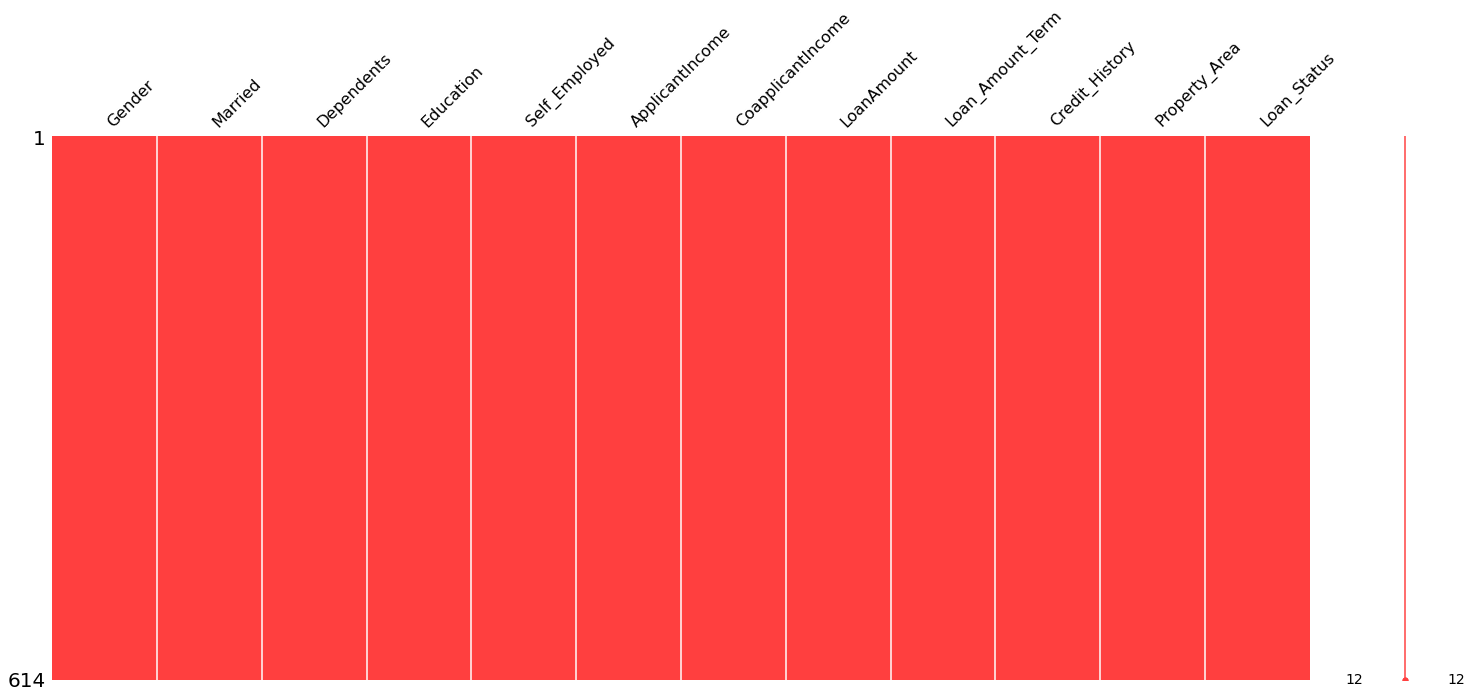

In [7]:
import missingno as msno
msno.matrix(loan,color=(1, 0.25, 0.25));

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.412162,342.410423,0.84202
std,6109.041673,2926.248369,84.037468,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.250000,360.000000,1.00000
50%,3812.500000,1188.500000,129.000000,360.000000,1.00000
75%,5795.000000,2297.250000,164.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


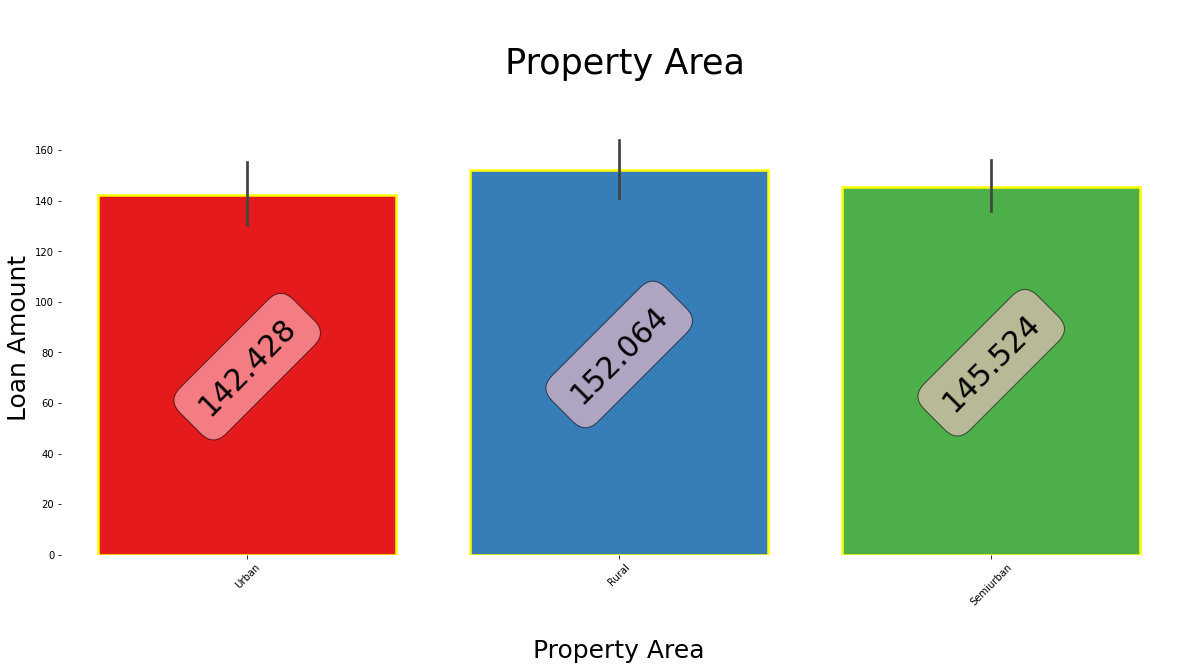

In [10]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=loan["Property_Area"],y=loan["LoanAmount"],palette="Set1", saturation=2, edgecolor = "yellow", linewidth = 2.5,)
p.axes.set_title("\n Property Area\n", fontsize=35)
plt.ylabel("Loan Amount" , fontsize = 25)
plt.xlabel("\nProperty Area" , fontsize = 25)
# plt.yscale("log")
plt.xticks(rotation = 45)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 8,size = 30,color = "black",rotation = 45,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "pink", "edgecolor": "black", "alpha": .6})

sns.despine(left=True, bottom=True)
plt.show()

In [11]:
import category_encoders as ce 
encoder = ce.OrdinalEncoder(['Gender','Married','Education','Self_Employed','Property_Area'])
loan = encoder.fit_transform(loan)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
loan['Loan_Status'] = encoder.fit_transform(loan['Loan_Status'])

In [13]:
X = loan.drop('Loan_Status',axis=1)
y = loan['Loan_Status']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [15]:
X_train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
37,2,2,1,1,1,3667,1459.0,144.0,360.0,1.0,3


<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Model Building 📚</div>

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">LogisticRegression</strong> 🎲  </h1>

Training Accuracy    : 79.63 %
Model Accuracy Score : 82.11 %
--------------------------------------------------------


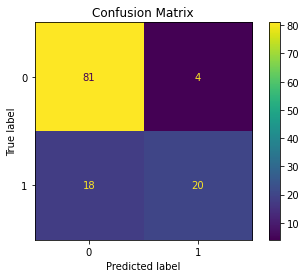

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">LogisticRegression GridSearchCV 📊📈</span>

In [17]:
C_vals = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17]
penalties = ['l2']

param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression()
## Calling on GridSearchCV object. 
grid_log = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5
                          )
## Fitting the model
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15,
                               16, 16.5, 17],
                         'penalty': ['l2']},
             scoring='accuracy')

In [18]:
print (grid_log.best_score_)
print (grid_log.best_params_)
print(grid_log.best_estimator_)

0.7922284065141209
{'C': 16, 'penalty': 'l2'}
LogisticRegression(C=16)


Training Accuracy with GridSearch : 79.63 %
Model Accuracy with GridSearch    : 80.0 %
--------------------------------------------------------


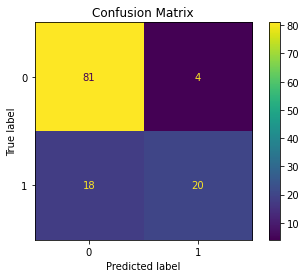

In [19]:
### Using the best parameters from the grid-search.
logreg_grid = grid_log.best_estimator_

log_train_grid = round(logreg_grid.score(X_train, y_train) * 100, 2)
log_accuracy_grid = logreg_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",log_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",log_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(grid_log, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;"> 🎲 <strong style="color:Red;font-size:40px;font-family:serif;">Decision Tree Classifier</strong> 🎲 </h1>

Training Accuracy    : 100.0 %
Model Accuracy Score : 73.98 %
--------------------------------------------------------
[[67 18]
 [14 24]]


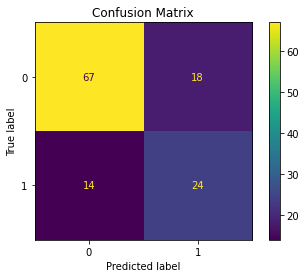

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');
print(confusion_matrix(y_test,y_pred_dec))

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">DecisionTreeClassifier GridSearchCV 📊📈</span>

In [21]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_dec.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             scoring='accuracy', verbose=1)

In [22]:
print (grid_dec.best_score_)
print (grid_dec.best_params_)
print(grid_dec.best_estimator_)

0.7788617886178861
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)


Training Accuracy with GridSearch : 79.84 %
Model Accuracy with GridSearch    : 80.0 %
--------------------------------------------------------


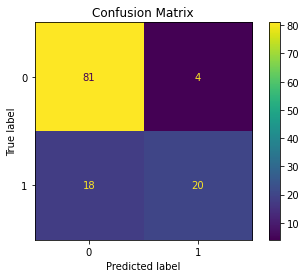

In [23]:
### Using the best parameters from the grid-search.
dec_grid = grid_dec.best_estimator_

decision_train_grid = round(dec_grid.score(X_train, y_train) * 100, 2)
decision_accuracy_grid = dec_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",decision_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",decision_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(grid_dec, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">KNN </strong> 🎲  </h1>

Training Accuracy    : 75.36 %
Model Accuracy Score : 60.98 %
--------------------------------------------------------


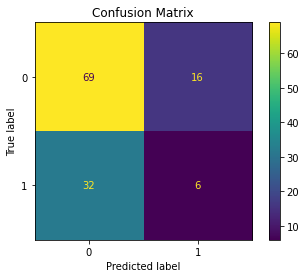

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">KNeighborsClassifier GridSearchCV 📊📈</span>

In [25]:
from sklearn.model_selection import GridSearchCV

k_range = range(1,31) 
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid_knn = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)

grid_knn.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [26]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

0.6891891891891893
{'n_neighbors': 26, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=26)


Training Accuracy with GridSearch : 68.64 %
Model Accuracy with GridSearch    : 69.0 %
--------------------------------------------------------


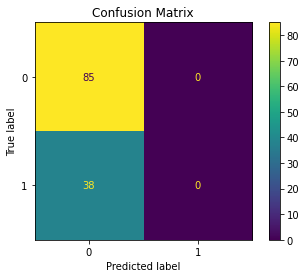

In [27]:
### Using the best parameters from the grid-search.
knn_grid = grid_knn.best_estimator_

knn_train_grid = round(knn_grid.score(X_train, y_train) * 100, 2)
knn_accuracy_grid = knn_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",knn_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",knn_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(knn_grid, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">AdaBoostClassifier </strong> 🎲  </h1>

Training Accuracy    : 83.3 %
Model Accuracy Score : 76.42 %
--------------------------------------------------------


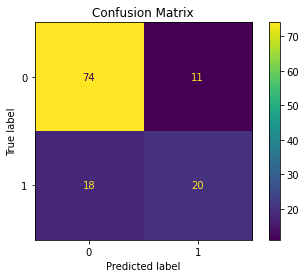

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(ada, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">AdaBoostClassifier GridSearchCV 📊📈</span>

In [29]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_ada = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_ada.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]})

In [30]:
print (grid_ada.best_score_)
print (grid_ada.best_params_)
print (grid_ada.best_estimator_)

0.7918918918918918
{'learning_rate': 0.01, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=0.01, n_estimators=100)


Training Accuracy with GridSearch : 79.84 %
Model Accuracy with GridSearch    : 80.0 %
--------------------------------------------------------


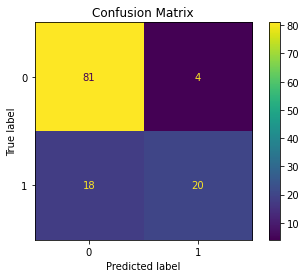

In [31]:
### Using the best parameters from the grid-search.
ada_grid = grid_ada.best_estimator_

ada_train_grid = round(ada_grid.score(X_train, y_train) * 100, 2)
ada_accuracy_grid = ada_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",ada_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",ada_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(ada_grid, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">GradientBoostingClassifier </strong> 🎲  </h1>

Training Accuracy    : 87.37 %
Model Accuracy Score : 75.61 %
--------------------------------------------------------


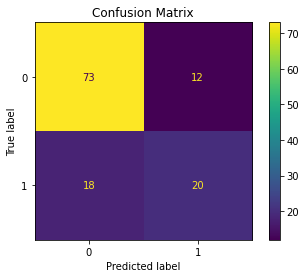

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)


gbc_train = round(gbc.score(X_train, y_train) * 100, 2)
gbc_accuracy = round(accuracy_score(y_pred_gbc, y_test) * 100, 2)

print("Training Accuracy    :",gbc_train ,"%")
print("Model Accuracy Score :",gbc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(gbc, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">GradientBoostingClassifier GridSearchCV 📊📈</span>

In [33]:
### BEGIN SOLUTION
from sklearn.ensemble import GradientBoostingClassifier
    
# The parameters to be fit
param_grid = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
    'n_estimators':[140, 150, 160], 
    'max_depth':[3, 4, 5]       
     }

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# The grid search object
grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv = cv,
                      verbose=0, 
                      n_jobs=-1)

grid_gbc.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [140, 150, 160]},
             scoring='f1')

In [34]:
print (grid_gbc.best_score_)
print (grid_gbc.best_params_)
print (grid_gbc.best_estimator_)

0.5192288777863995
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}
GradientBoostingClassifier(max_depth=4, n_estimators=140, random_state=42)


Training Accuracy with GridSearch : 99.39 %
Model Accuracy with GridSearch    : 99.0 %
--------------------------------------------------------


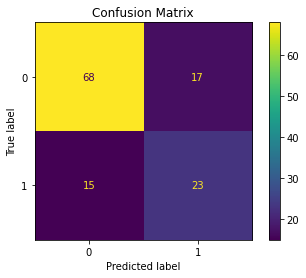

In [35]:
### Using the best parameters from the grid-search.
gbc_grid = grid_gbc.best_estimator_

gbc_train_grid = round(gbc_grid.score(X_train, y_train) * 100, 2)
gbc_accuracy_grid = gbc_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",gbc_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",gbc_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(gbc_grid, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;">SVC </strong> 🎲  </h1>

Training Accuracy    : 69.25 %
Model Accuracy Score : 69.11 %
--------------------------------------------------------
[[85  0]
 [38  0]]


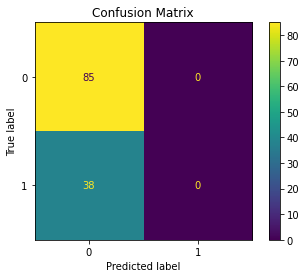

In [36]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

print(confusion_matrix(y_test,y_pred_svc))

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">SVC GridSearchCV 📊📈</span>

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} # 'precomputed','sigmoid','linear','poly','rbf'

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=cv)
 
# fitting the model for grid search
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
print (grid_svc.best_score_)
print (grid_svc.best_params_)
print (grid_svc.best_estimator_)

0.7013513513513514
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)


Training Accuracy with GridSearch : 97.96 %
Model Accuracy with GridSearch    : 98.0 %
--------------------------------------------------------


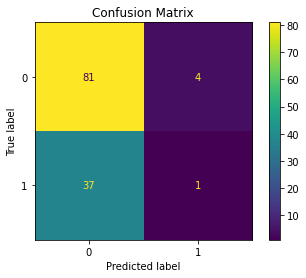

In [39]:
### Using the best parameters from the grid-search.
svc_grid = grid_svc.best_estimator_

svc_train_grid = round(svc_grid.score(X_train, y_train) * 100, 2)
svc_accuracy_grid = svc_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",svc_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",svc_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(grid_svc, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;"> RandomForestClassifier </strong> 🎲  </h1>

Training Accuracy    : 100.0 %
Model Accuracy Score : 78.05 %
--------------------------------------------------------


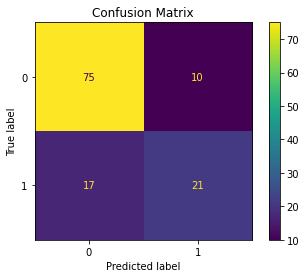

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">RandomForestClassifier GridSearchCV 📊📈</span>

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

rf = RandomForestClassifier()
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9, 10],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [42]:
print (grid_rf.best_score_)
print (grid_rf.best_params_)
print (grid_rf.best_estimator_)

0.7983265306122448
{'max_depth': 2, 'n_estimators': 500}
RandomForestClassifier(max_depth=2, n_estimators=500)


Training Accuracy with GridSearch : 79.84 %
Model Accuracy with GridSearch    : 80.0 %
--------------------------------------------------------


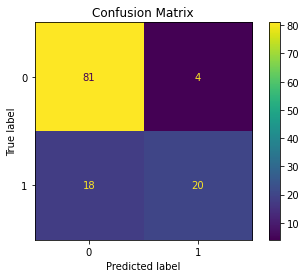

In [43]:
### Using the best parameters from the grid-search.
rf_grid = grid_rf.best_estimator_

rf_train_grid = round(rf_grid.score(X_train, y_train) * 100, 2)
rf_accuracy_grid = rf_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",rf_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",rf_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(rf_grid, X_test, y_test);
plt.title('Confusion Matrix');

<h1 style="color:#5642C5;font-size:45px;font-family:Georgia;text-align:center;">  🎲  <strong style="color:Red;font-size:40px;font-family:serif;"> BaggingClassifier </strong> 🎲  </h1>

Training Accuracy    : 98.37 %
Model Accuracy Score : 77.24 %
--------------------------------------------------------


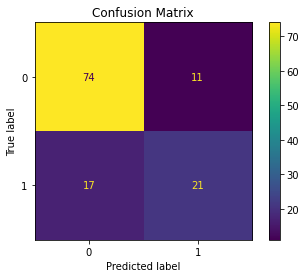

In [44]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier()
Bag.fit(X_train,y_train)
y_pred_Bag = Bag.predict(X_test)


Bag_train = round(Bag.score(X_train, y_train) * 100, 2)
Bag_accuracy = round(accuracy_score(y_pred_Bag, y_test) * 100, 2)

print("Training Accuracy    :",Bag_train ,"%")
print("Model Accuracy Score :",Bag_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Bag, X_test, y_test);
plt.title('Confusion Matrix');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">BaggingClassifier GridSearchCV 📊📈</span>

In [45]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid_bagg = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_bagg.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [46]:
print (grid_bagg.best_score_)
print (grid_bagg.best_params_)
print (grid_bagg.best_estimator_)

0.7621621621621621
{'n_estimators': 30}
BaggingClassifier(n_estimators=30)


Training Accuracy with GridSearch : 100.0 %
Model Accuracy with GridSearch    : 100.0 %
--------------------------------------------------------


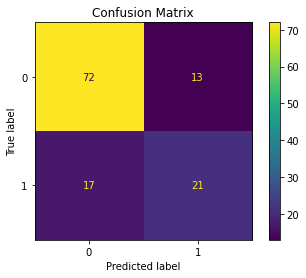

In [47]:
### Using the best parameters from the grid-search.
bagg_grid = grid_bagg.best_estimator_

bagg_train_grid = round(bagg_grid.score(X_train, y_train) * 100, 2)
bagg_accuracy_grid = bagg_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",bagg_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",bagg_accuracy_grid ,"%")
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(bagg_grid, X_test, y_test);
plt.title('Confusion Matrix');

<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Comparing Models 📚</div>

In [48]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Decision Tree','KNN', 'AdaBoostClassifier', 'GradientBoostingClassifier',
        'Support Vector Machines','Random Forest', 'BaggingClassifier'
        
    ],
    
    'Model Accuracy Score': [
        log_accuracy, decision_accuracy, knn_accuracy,ada_accuracy,gbc_accuracy, svc_accuracy,
        random_forest_accuracy,Bag_accuracy
    ],
    'Model Accuracy with GridSearch': [
        log_accuracy_grid, decision_accuracy_grid, knn_accuracy_grid,ada_accuracy_grid,gbc_accuracy_grid, svc_accuracy_grid,
        rf_accuracy_grid,bagg_accuracy_grid
    ]
})

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Comparing Models Result </span>

In [49]:
pd.set_option('precision',2)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score,Model Accuracy with GridSearch
Logistic Regression,82.11,80.00
Random Forest,78.05,80.00
BaggingClassifier,77.24,100.00
AdaBoostClassifier,76.42,80.00
GradientBoostingClassifier,75.61,99.00
Decision Tree,73.98,80.00
Support Vector Machines,69.11,98.00
KNN,60.98,69.00


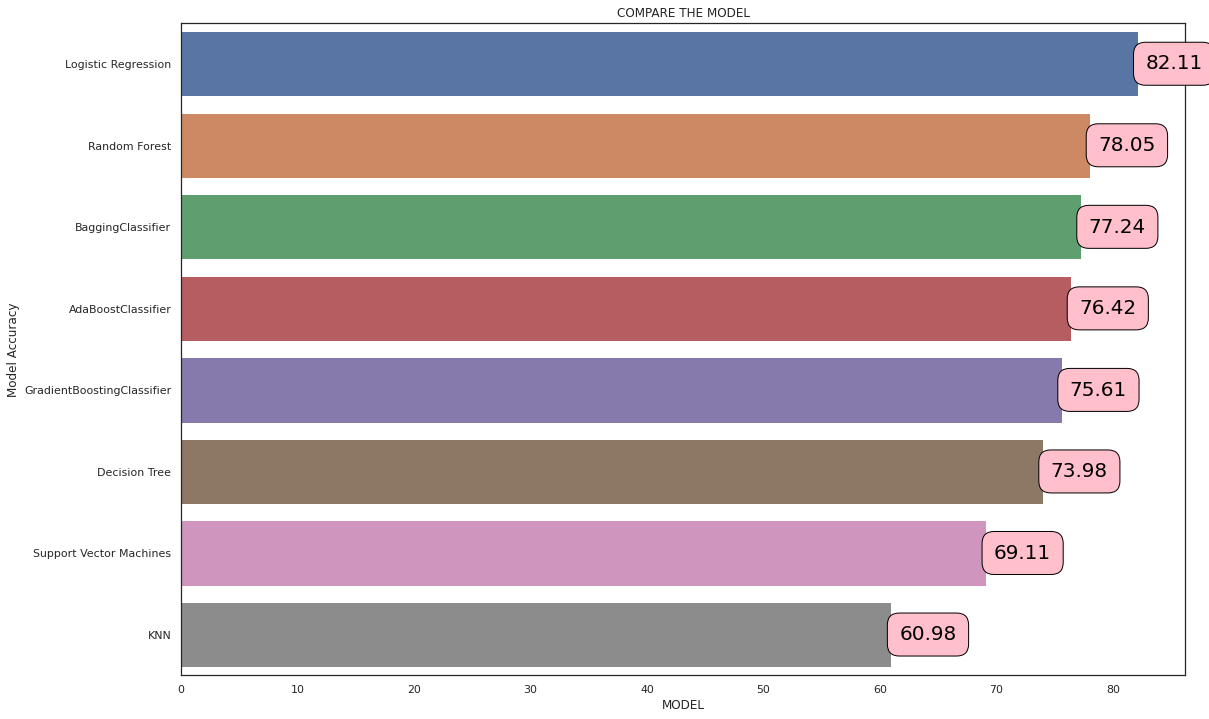

In [50]:
p = plt.figure(figsize=(18,12))

p = sns.set_theme(style="white")

p= models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

p = sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'edge',padding = 8,size = 20,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "pink", "edgecolor": "black", "alpha": 1})
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Model Accuracy');

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Comparing Models Result with GridSearchCv</span>

In [51]:
pd.set_option('precision',2)

models.sort_values(by='Model Accuracy with GridSearch', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score,Model Accuracy with GridSearch
BaggingClassifier,77.24,100.00
GradientBoostingClassifier,75.61,99.00
Support Vector Machines,69.11,98.00
Logistic Regression,82.11,80.00
Random Forest,78.05,80.00
AdaBoostClassifier,76.42,80.00
Decision Tree,73.98,80.00
KNN,60.98,69.00


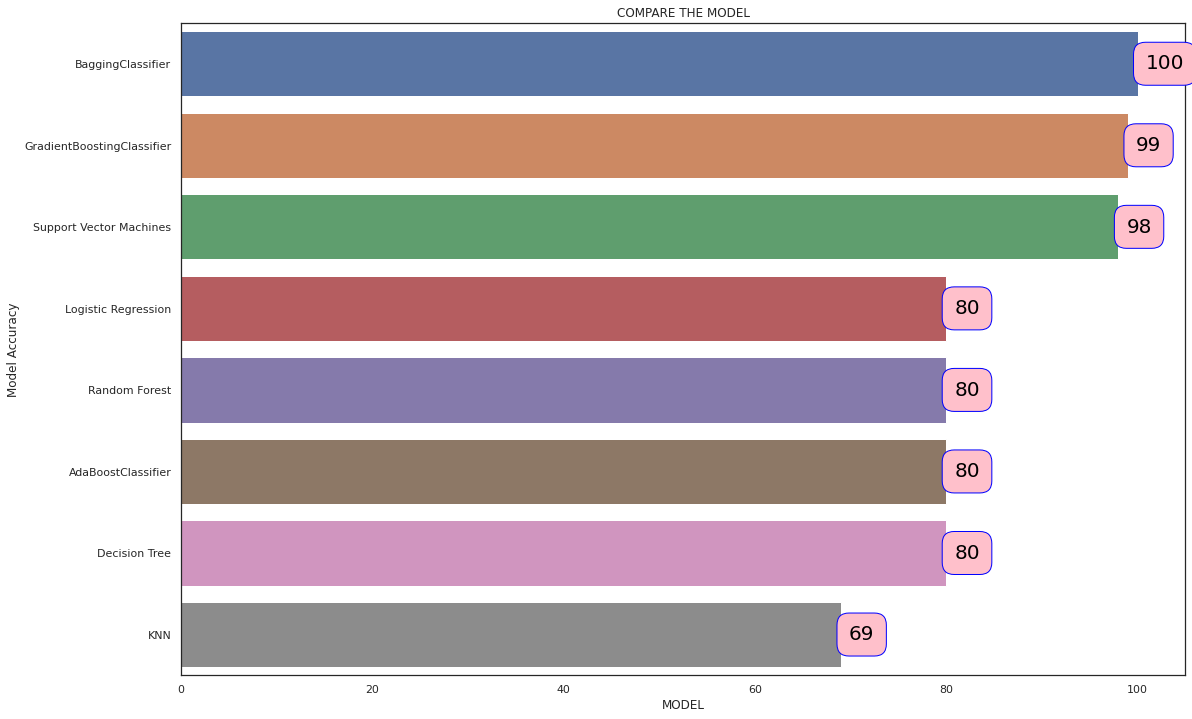

In [52]:
p = plt.figure(figsize=(18,12))
p = sns.set_theme(style="white")

p = models=models.sort_values(by='Model Accuracy with GridSearch',ascending=False)[:8]

p = sns.barplot(y= 'Model', x= 'Model Accuracy with GridSearch', data= models)

for container in p.containers:
    p.bar_label(container,label_type = 'edge',padding = 8,size = 20,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "pink", "edgecolor": "Blue", "alpha": 1})

plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Model Accuracy');

<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Voting Classifier 📚</div>

In [53]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(max_iter=100,tol=20,random_state=42)
mlp_clf = MLPClassifier(random_state=42)

estimators = [rnd_clf,extra_trees_clf,svm_clf,mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train,y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the SVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [54]:
from sklearn.ensemble import VotingClassifier

named_estimators = [
    ("random_forest_clf",rnd_clf),
    ("Extra_trees_clf",extra_trees_clf),
    ("SVM",svm_clf),
    ("MLP",mlp_clf)
]

voting_clf = VotingClassifier(named_estimators)

print(voting_clf.fit(X_train,y_train))
print("voting_clf.score:",voting_clf.score(X_test,y_test))

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('Extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('SVM',
                              SVC(max_iter=100, random_state=42, tol=20)),
                             ('MLP', MLPClassifier(random_state=42))])
voting_clf.score: 0.7967479674796748


<div style="color:white;background-color:#5642C5;padding:3%;border-radius:110px 110px;font-size:2.5em;text-align:center">Roc Curve 📚</div>

In [55]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400,
                eval_metric='mlogloss')

        pred = alg.predict_proba(x_test)
        loss = log_loss(y_test, pred)
        print(f"Log loss: {loss}")
        print("-"*50)
    
    return alg

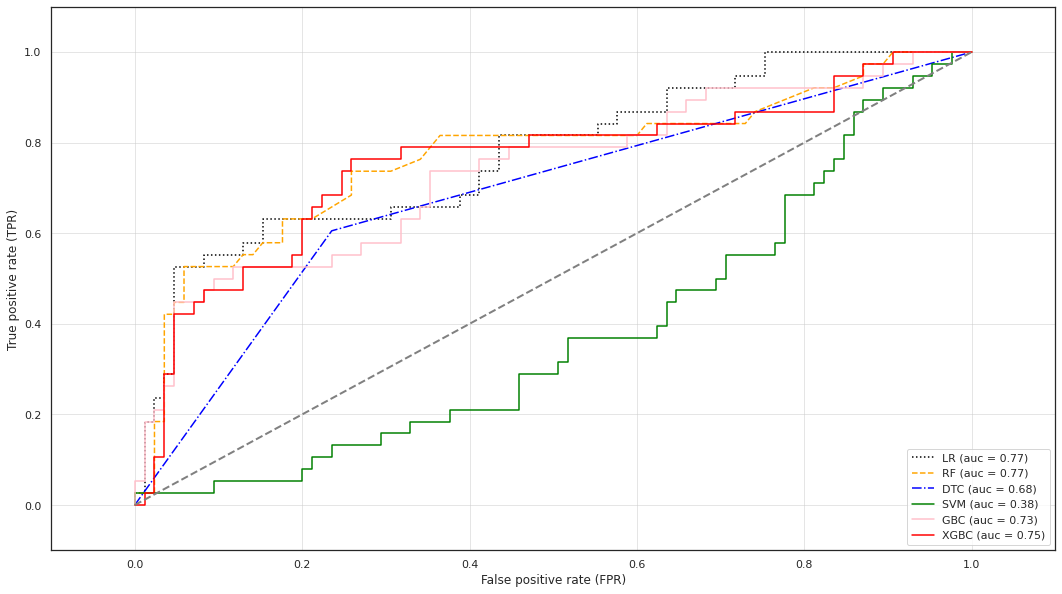

In [56]:
plt.figure(figsize=(18,10))
sns.set_style(style="white")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


all_clf=[lr, rf,dtc,svm,gbc,xgbc]
clf_labels=["LR", "RF","DTC", "SVM","GBC","XGBC"]
colors =["black", "orange", "blue", "green","pink","red"]
linestyles = [":","--", "-.","-","-","-"]

for clf, label,clr,ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred= clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(y_true= y_test, y_score=y_pred)
  roc_auc= auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls,
           label='%s (auc = %0.2f)' % (label, roc_auc))
  
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()